The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [400]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Start coding here!
df = pd.read_csv('data/nobel.csv')
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [401]:
df.describe()

,year,laureate_id
count,1000.000000,1000.000000
mean,1973.721000,509.099000
std,34.523195,298.130617
min,1901.000000,1.000000
25%,1949.750000,250.750000
50%,1979.000000,500.500000
75%,2003.000000,764.250000
max,2023.000000,1034.000000


In [402]:
df['category'].value_counts()

Medicine      227
Physics       225
Chemistry     194
Peace         141
Literature    120
Economics      93
Name: category, dtype: int64

In [403]:
top_gender = df['sex'].value_counts().idxmax()

In [404]:
top_gender

'Male'

In [405]:
top_country = df['birth_country'].value_counts().idxmax()

In [406]:
top_country

'United States of America'

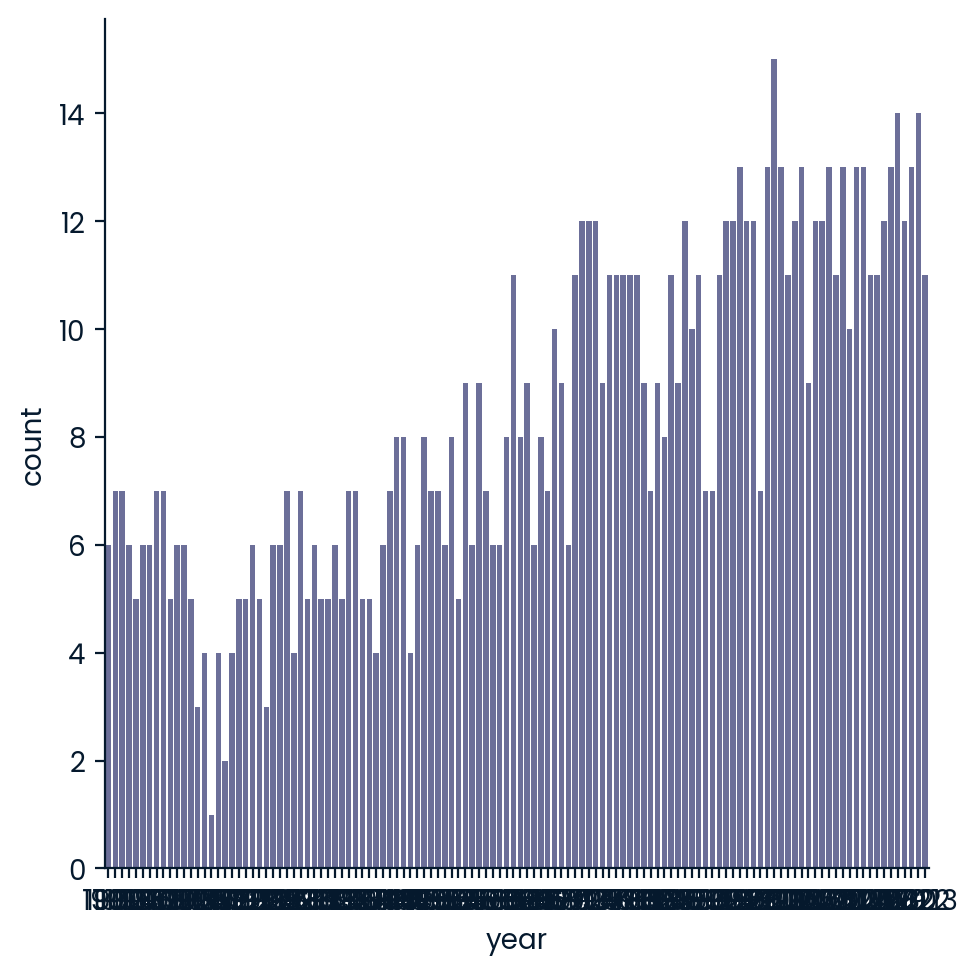

In [407]:
sns.catplot(x='year', data=df, kind='count')
plt.show()

In [408]:
df['decade'] = ((df['year'] - 1900) // 10) * 10 + 1900

In [409]:
df[df['birth_country'] == 'USA']

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade
925,2018,Physics,The Nobel Prize in Physics 2018,"""for the optical tweezers and their applicatio...",1/2,960,Individual,Arthur Ashkin,1922-09-02,"New York, NY",USA,Male,Bell Laboratories,"Holmdel, NJ",United States of America,2020-09-21,"Rumson, NJ",United States of America,2010


In [410]:
df['birth_country'].replace('USA', 'United States of America', inplace=True)

In [411]:
max_decade_usa = df[df['birth_country'] == 'United States of America']['decade'].value_counts().sort_index() / df['decade'].value_counts().sort_index()

In [412]:
max_decade_usa = max_decade_usa.idxmax()

In [413]:
max_decade_usa

2000

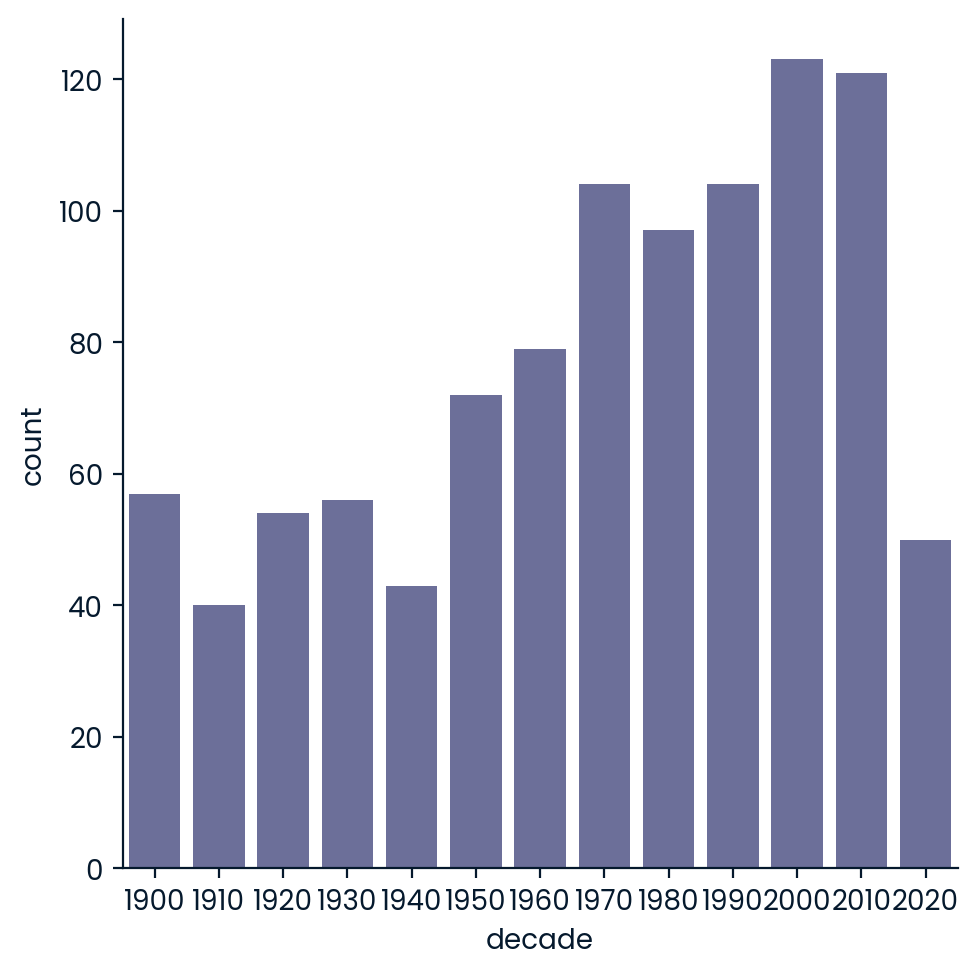

In [414]:
sns.catplot(x='decade', data=df, kind='count')
plt.show()

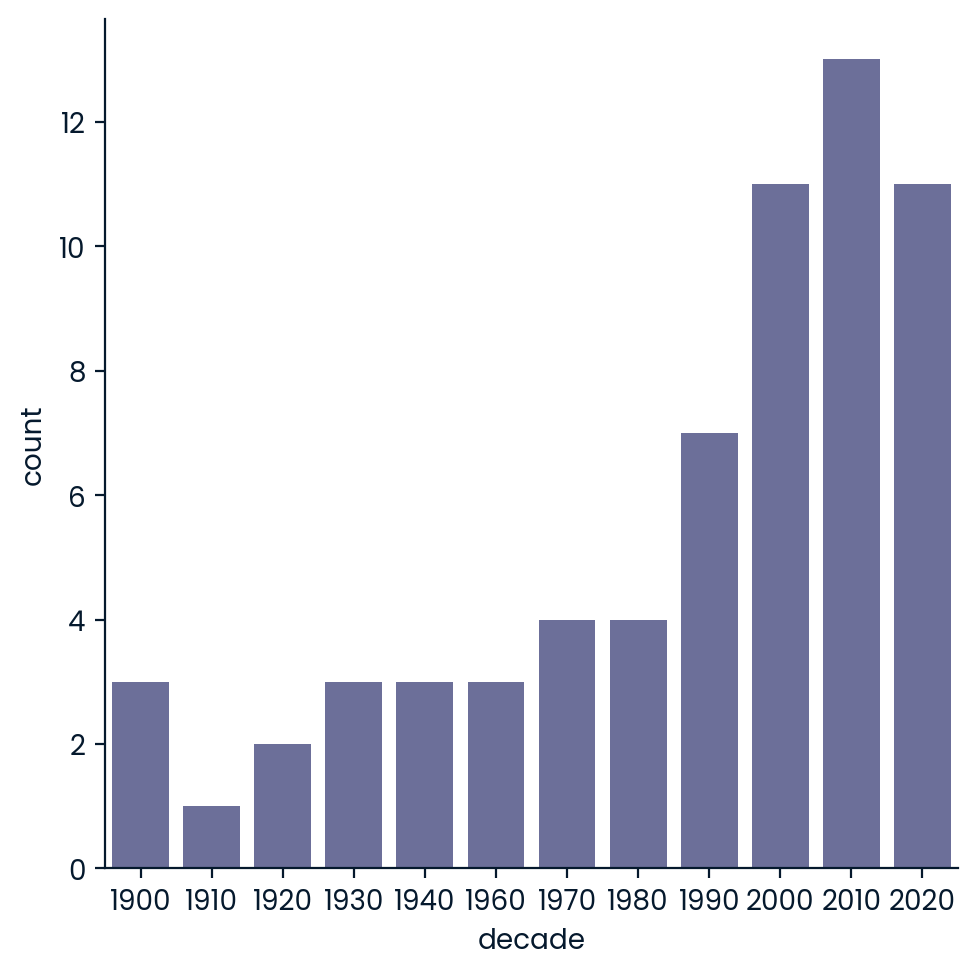

In [415]:
sns.catplot(x='decade', data=df[df['sex'] == 'Female'], kind='count')
plt.show()

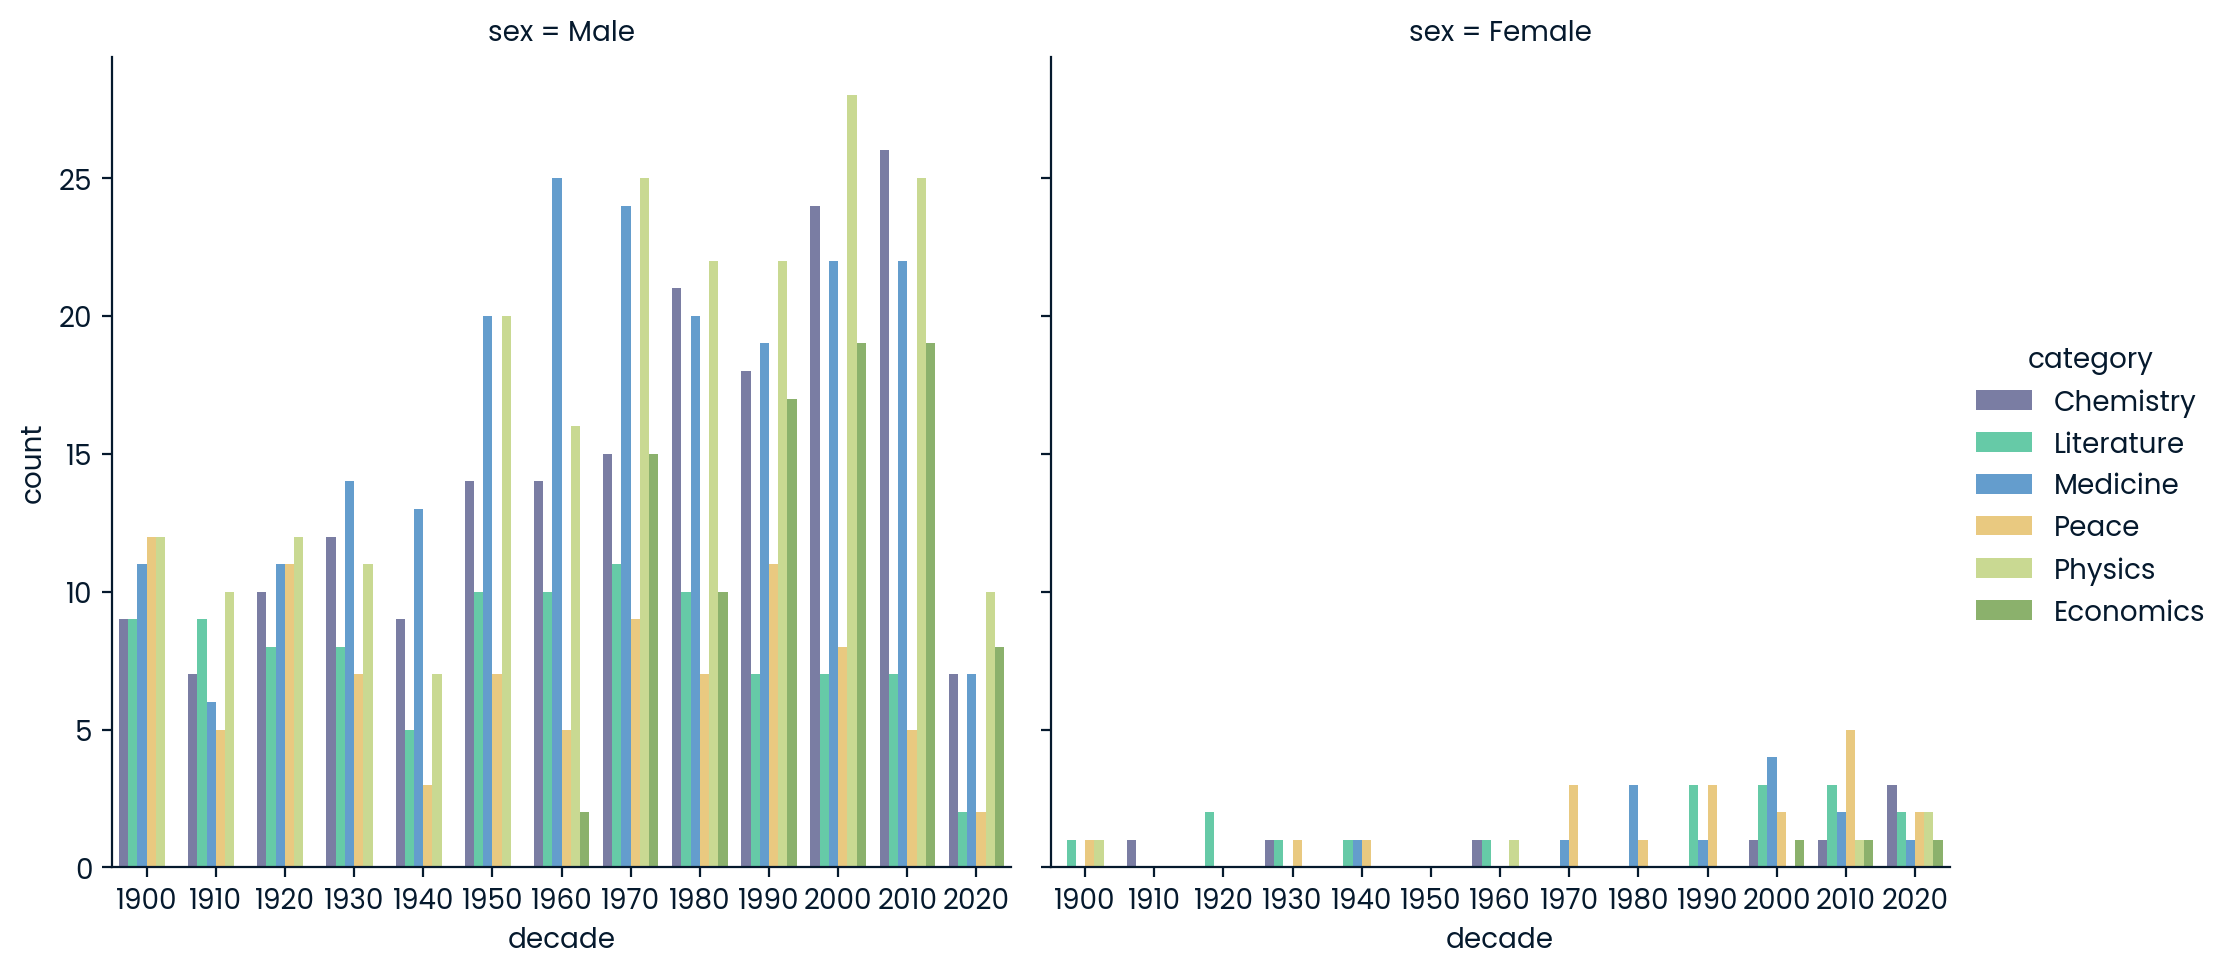

In [416]:
sns.catplot(x='decade', data=df, kind='count', col='sex', hue='category', alpha=0.9)
plt.show()

In [417]:
max_all = df.groupby(['decade', 'category']).size()
max_female = df[df['sex'] == 'Female'].groupby(['decade', 'category']).size()

In [418]:
max_all.sort_index(inplace=True)

In [419]:
max_female.sort_index(inplace=True)

In [420]:
max_female_ratio = max_female / max_all
max_female_ratio

decade  category  
1900    Chemistry          NaN
        Literature    0.100000
        Medicine           NaN
        Peace         0.071429
        Physics       0.076923
                        ...   
2020    Economics     0.111111
        Literature    0.500000
        Medicine      0.125000
        Peace         0.285714
        Physics       0.166667
Length: 72, dtype: float64

In [421]:
max_female_dict = max_female_ratio.idxmax()
max_female_dict = {max_female_dict[0]:max_female_dict[1]}

In [422]:
max_female_dict

{2020: 'Literature'}

In [423]:
first_woman = df[['full_name', 'category', 'year', 'sex']].sort_values('year')
first_woman = first_woman[first_woman['sex'] == 'Female'].reset_index(drop=True)
first_woman_name, first_woman_category = first_woman.loc[0, 'full_name'], first_woman.loc[0, 'category']
first_woman_name, first_woman_category

('Marie Curie, née Sklodowska', 'Physics')

In [424]:
repeats = df['full_name'].value_counts()

In [425]:
repeats = repeats[repeats >= 2].index

In [426]:
repeat_list = list(repeats)
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']